# MULTICLASS CLASSIFICATION 



In [78]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [98]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [80]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8000, 28, 28)
(2000, 28, 28)
(8000,)
(2000,)


In [81]:
#print the unique values in Y_train
print(set(Y_train))


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


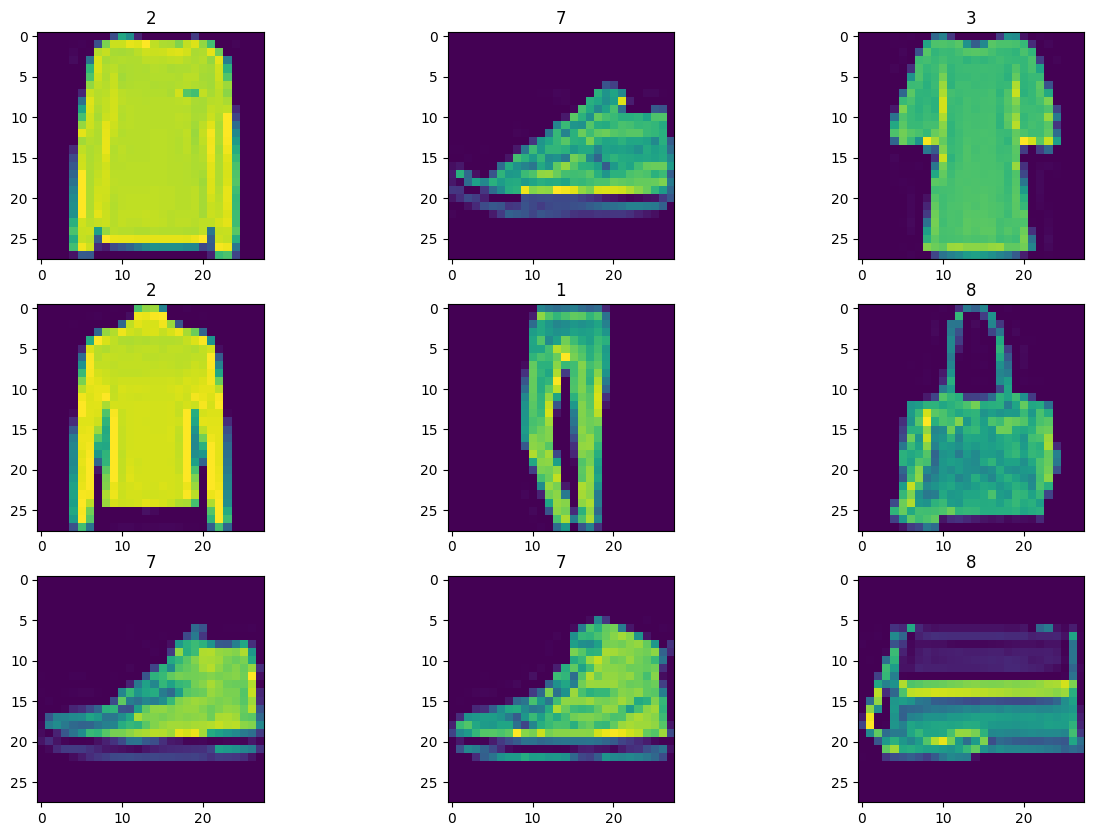

In [99]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(15,10))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  #edit1__plot_image_here_

  #edit2__add_label_here
  plt.imshow(X_train[index])  
  plt.title(Y_train[index]) 


plt.show()



###These number denotes the respective object
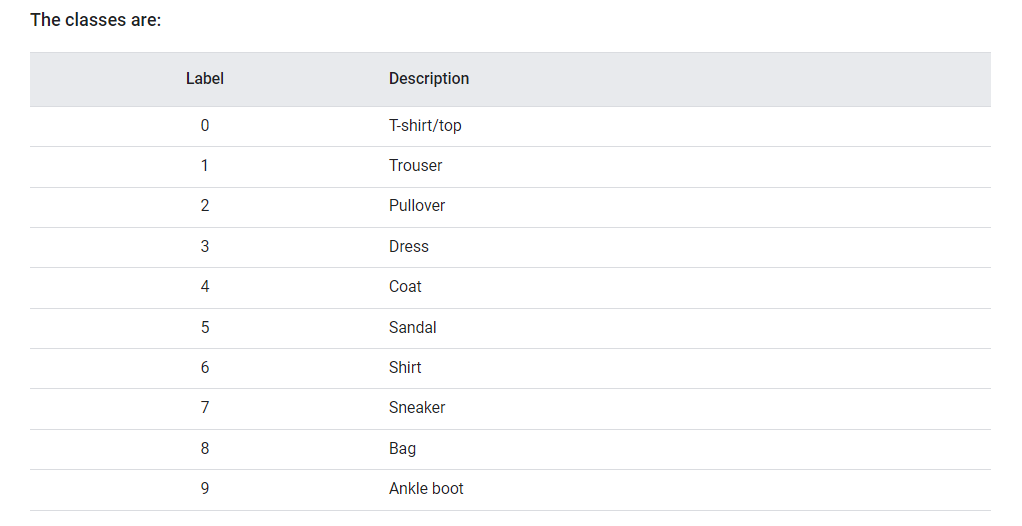

In [110]:
# Find the count of each type of class
unique_values, count = np.unique(Y_train, return_counts=True)
for i in range(len(unique_values)):
  print("Class:", unique_values[i], "Count:", count[i])


Class: 0 Count: 792
Class: 1 Count: 798
Class: 2 Count: 797
Class: 3 Count: 815
Class: 4 Count: 799
Class: 5 Count: 807
Class: 6 Count: 782
Class: 7 Count: 808
Class: 8 Count: 806
Class: 9 Count: 796


In [101]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))

#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [102]:
from pickle import FALSE
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [103]:
#Lets analyse the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               100480    
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [87]:
""" 
[objective] Write the answer here:
There are 111,146 Trainable Parameters abd 0 Non-trainable parameters 
"""

' \n[objective] Write the answer here:\nThere are 111,146 Trainable Parameters abd 0 Non-trainable parameters \n'

In [105]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train,Y_train,batch_size=32,epochs=12, validation_split=0.2)

Epoch 1/12
200/200 [==============================] - 1s 3ms/step - loss: 0.5270 - accuracy: 0.8089 - val_loss: 0.6361 - val_accuracy: 0.7756
Epoch 2/12
200/200 [==============================] - 1s 3ms/step - loss: 0.5130 - accuracy: 0.8097 - val_loss: 0.6481 - val_accuracy: 0.7619
Epoch 3/12
200/200 [==============================] - 1s 3ms/step - loss: 0.4970 - accuracy: 0.8172 - val_loss: 0.6276 - val_accuracy: 0.7806
Epoch 4/12
200/200 [==============================] - 1s 3ms/step - loss: 0.4838 - accuracy: 0.8195 - val_loss: 0.6382 - val_accuracy: 0.7969
Epoch 5/12
200/200 [==============================] - 1s 3ms/step - loss: 0.4699 - accuracy: 0.8286 - val_loss: 0.6121 - val_accuracy: 0.7937
Epoch 6/12
200/200 [==============================] - 1s 3ms/step - loss: 0.4664 - accuracy: 0.8270 - val_loss: 0.6055 - val_accuracy: 0.7919
Epoch 7/12
200/200 [==============================] - 1s 3ms/step - loss: 0.4539 - accuracy: 0.8323 - val_loss: 0.6201 - val_accuracy: 0.7856
Epoch 

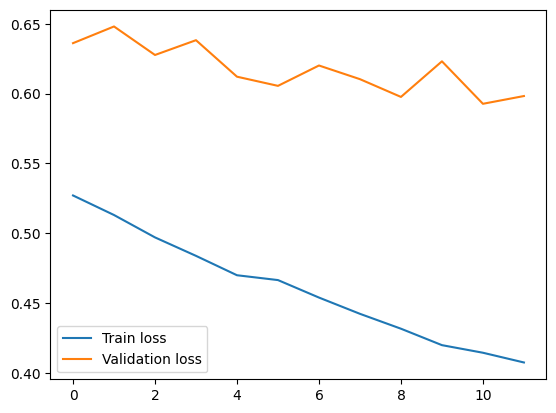

In [106]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()

###What do you infer from the graph of losses above?

In [90]:
"""
[Under 100 words] Write your answer here: 

In this graph Train loss is less than validation loss this is a case of overfitting.
A model is said to be overfitted when the model does not make accurate predictions on testing data.
when the model is too complex and has many parameters it might be overfitted
Also here the gap between train loss and validation loss is approx 0.1091-0.1908  it might because the training duration is not sufficient or 
due to the difference of data quality between training and validation sets

"""

'\n[Under 100 words] Write your answer here: \n\nIn this graph Train loss is less than validation loss this is a case of overfitting.\nA model is said to be overfitted when the model does not make accurate predictions on testing data.\nwhen the model is too complex and has many parameters it might be overfitted\nAlso here the gap between train loss and validation loss is approx 0.1675-0.1156 it might because the training duration is not sufficient or \ndue to the difference of data quality between training and validation sets\n\n'

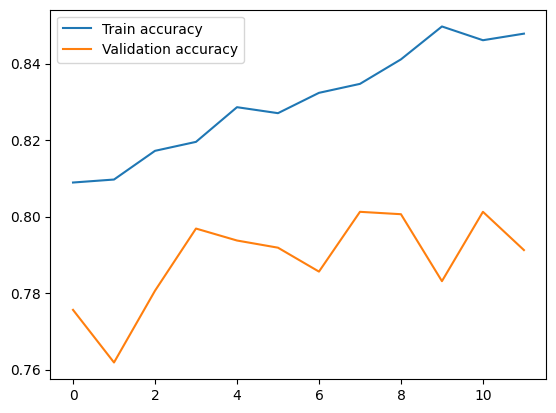

In [107]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [92]:
"""
[Under 100 words] Write your answer here:

In this graph train accuracy is more than validation accuracy this is a case of overfitting 
A model is said to be overfitted when the model does not make accurate predictions on testing data.
"""

'\n[Under 100 words] Write your answer here:\n\nIn this graph train accuracy is more than validation accuracy this is a case of overfitting \nA model is said to be overfitted when the model does not make accurate predictions on testing data.\n'

In [108]:
#Checking the prediction

Y_predicted = model.predict(X_test)
Y_pred = np.argmax(Y_predicted,axis=1)

63/63 [==============================] - 0s 2ms/step


In [109]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
R2score=r2_score(Y_test, Y_pred)
print(R2score)


0.6903574886090433


In [95]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [96]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape)
print(model.layers[3].kernel.shape)
print(model.layers[4].kernel.shape)

(128, 64)
(64, 32)
(32, 10)


In [97]:
# Does that satisfied the matrix multiplication math discussed earlier


Yes, it satisfies the matrix multiplication, here the input layer is a matrix [1 x 784] which then multiplies with the weight of first layer that is [784 x 128] we get the next layer that is of size [1 x 128] and similarly for other layers doing the same thing we get the output layer as [1 x 10]. 